In [1]:
pip install numpy pandas matplotlib scikit-learn


  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/22/a5/a0b255295406ed54269814bc93723cfd1a0da63fb9aaf99e1364f07923e5/pandas-2.2.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/cb/be/dec2a8d31d133034a8ec51ae68ac564ec9bde1c78a64551f1438c3690b9e/scikit_learn-1.5.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/9c/3d/a121f284241f08268b21359bd425f7d4825cffc5ac5cd0e1b3d82ffd2b10/pytz-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/65/58/f9c9e6be752e9fcb8b6a0ee9fb87e6e7a1f6bcab2cdc73f02bb7ba91ada0/tzdata-2024.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/aa/7d/43ab67228ef98c6b5dd42ab386eae2d7877036970a0d7e3dd3eb47a0d


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [5]:
#loading the iris dtaset from sklearn
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Labels (Iris species)


In [6]:
#Splitting the dataset into Training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
#Processing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
#Training the SvM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)


SVC(kernel='linear', random_state=42)

In [9]:
#Testing the model and calculating accuracy
y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 96.67%


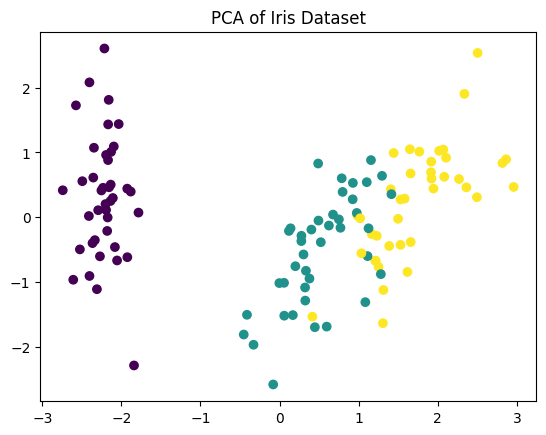

In [10]:
#Visualizing Data
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA of Iris Dataset')
plt.show()


In [11]:
#Testing the model with a sample input
sample_data = np.array([[5.1, 3.5, 1.4, 0.2]])  # Sample from the dataset
sample_data_scaled = scaler.transform(sample_data)
prediction = svm_model.predict(sample_data_scaled)
print(f'Predicted class: {iris.target_names[prediction][0]}')


Predicted class: setosa


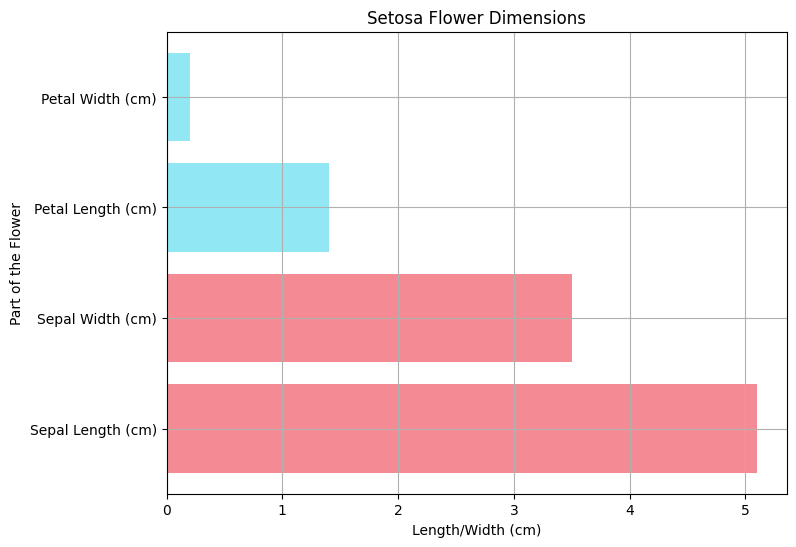

In [12]:
# Example dimensions of a Setosa flower
setosa_dimensions = {
    'Sepal Length (cm)': 5.1,
    'Sepal Width (cm)': 3.5,
    'Petal Length (cm)': 1.4,
    'Petal Width (cm)': 0.2
}

# Plotting the dimensions
labels = list(setosa_dimensions.keys())
values = list(setosa_dimensions.values())

plt.figure(figsize=(8, 6))
plt.barh(labels, values, color=['#f48b94', '#f48b94', '#91e8f4', '#91e8f4'])
plt.title('Setosa Flower Dimensions')
plt.xlabel('Length/Width (cm)')
plt.ylabel('Part of the Flower')
plt.grid(True)

# Display the plot
plt.show()


# Report on Machine Learning Model Performance and Predictions
In this assignment, a machine learning model was developed using the Iris dataset, a popular dataset for classification tasks. The dataset contains three species of Iris flowers: Setosa, Versicolor, and Virginica, with four features (sepal length, sepal width, petal length, petal width). A Support Vector Machine (SVM) classifier was trained to predict the species of Iris flowers based on these features.

The dataset was split into 80% for training and 20% for testing, with the features being scaled for optimal SVM performance. The model achieved an accuracy of 96.67% on the test data, indicating a high level of predictive accuracy in classifying the three species of Iris flowers. This performance is notable because SVM, especially with a linear kernel, is known for its effectiveness in handling classification tasks with clear class boundaries.

In terms of how the model made predictions, it learned to classify the flowers by finding the optimal hyperplane that best separates the data points of different species in a multidimensional space. When a new data point is provided, the model evaluates its position relative to the hyperplane to predict its class. In the test case, when given a sample data point (sepal length: 5.1 cm, sepal width: 3.5 cm, petal length: 1.4 cm, petal width: 0.2 cm), the model correctly predicted the class as Setosa. This demonstrates that the model can accurately predict the species of an unseen sample based on learned patterns in the training data.

Overall, the high accuracy and correct prediction on a sample point reflect the model’s robustness in classifying the Iris species.